In [12]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
import os
import sys
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
np.set_printoptions(precision=3, suppress=True)
np.set_printoptions(formatter={'float': '{: 0.3f}'.format})
from sklearn.decomposition import PCA

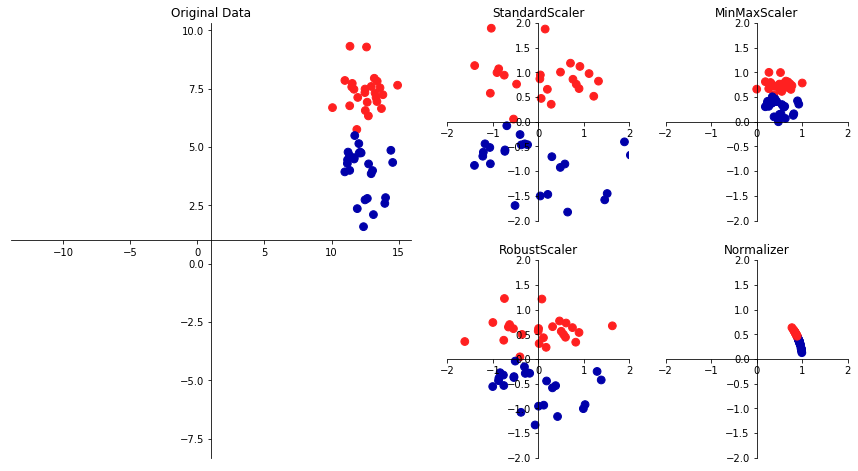

In [2]:
mglearn.plots.plot_scaling()

In [5]:
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], random_state=42)

In [7]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [10]:
scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
scaler.data_max_

array([2.811e+01, 3.928e+01, 1.885e+02, 2.501e+03, 1.634e-01, 3.114e-01,
       4.268e-01, 2.012e-01, 3.040e-01, 9.744e-02, 2.873e+00, 4.885e+00,
       2.198e+01, 5.422e+02, 3.113e-02, 1.354e-01, 3.960e-01, 5.279e-02,
       6.146e-02, 2.984e-02, 3.604e+01, 4.954e+01, 2.512e+02, 4.254e+03,
       2.184e-01, 9.379e-01, 9.608e-01, 2.910e-01, 6.638e-01, 1.730e-01])

In [12]:
X_train_scaled = scaler.transform(X_train)

In [16]:

print(X_train_scaled[1])


[ 0.280  0.366  0.290  0.166  0.523  0.437  0.339  0.406  0.507  0.491
  0.101  0.126  0.110  0.050  0.126  0.153  0.087  0.253  0.171  0.107
  0.283  0.470  0.299  0.154  0.586  0.393  0.531  0.705  0.398  0.474]


In [22]:
from sklearn.svm import SVC
dataset = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(dataset['data'], dataset['target'], random_state=42)
svm = SVC(C=100)
svm.fit(X_train, y_train)
print("Train set accuracy : {:.3f}".format(svm.score(X_train, y_train)))
print("Test set accuracy  : {:.3f}".format(svm.score(X_test, y_test)))

Train set accuracy : 1.000
Test set accuracy  : 0.622


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train_scaler = scaler.transform(X_train)
X_test_scaler = scaler.transform(X_test)
svm.fit(X_train_scaler, y_train)
print("Train set accuracy : {:.3f}".format(svm.score(X_train_scaler, y_train)))
print("Test set accuracy  : {:.3f}".format(svm.score(X_test_scaler, y_test)))

Train set accuracy : 0.981
Test set accuracy  : 0.979


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


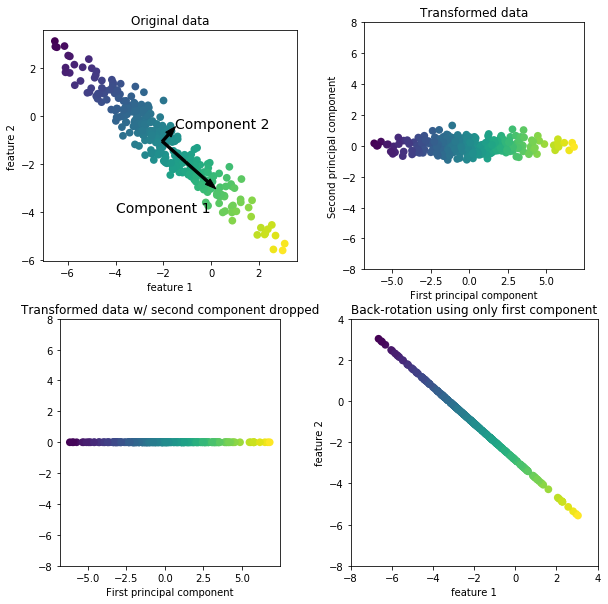

In [31]:
mglearn.plots.plot_pca_illustration()

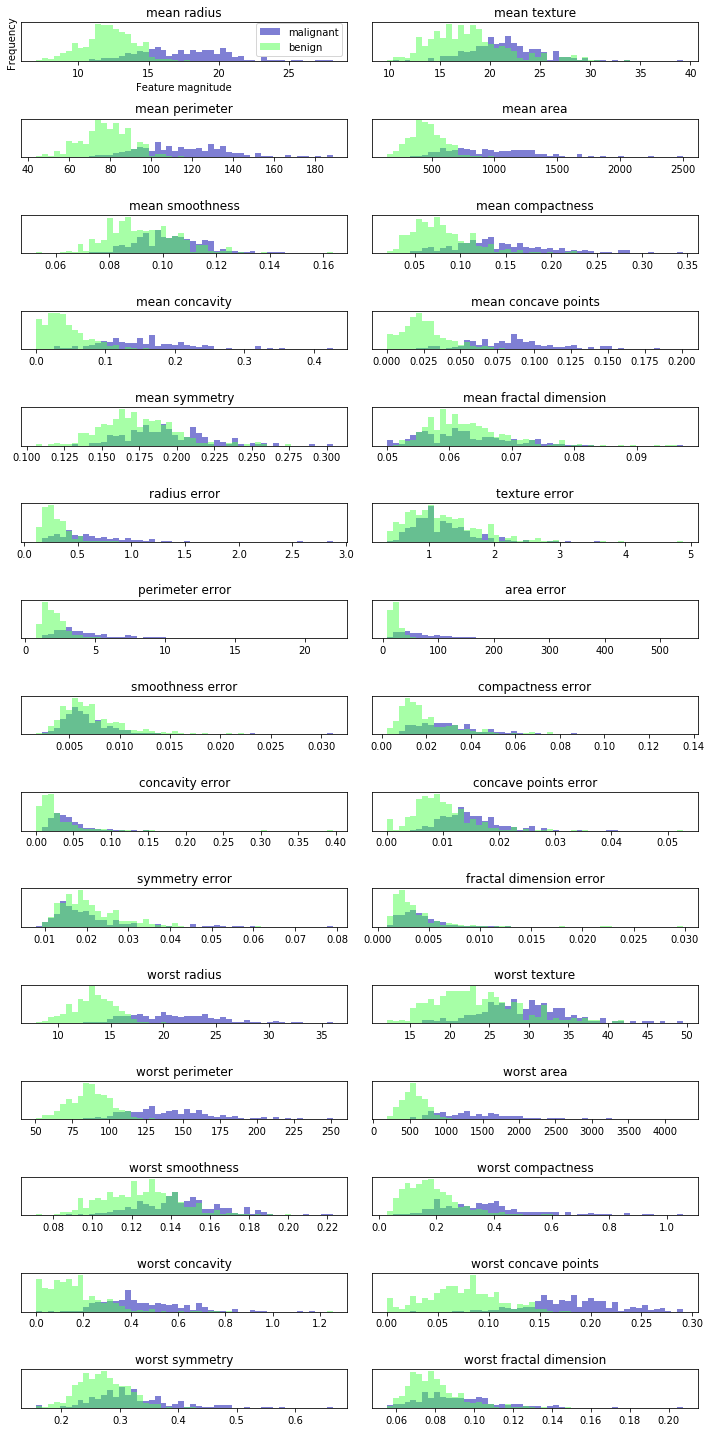

In [40]:
fig, axes = plt.subplots(15, 2, figsize=(10, 20))
malignant = dataset.data[dataset.target==0]
benign = dataset.data[dataset.target==1]

ax = axes.ravel()
for i in range(30):
    _, bins = np.histogram(dataset.data[:, i], bins=50)
    ax[i].hist(malignant[:, i], bins=bins, color=mglearn.cm3(0), alpha=.5)
    ax[i].hist(benign[:, i], bins =bins, color=mglearn.cm3(2), alpha=.5)
    ax[i].set_title(dataset.feature_names[i])
    ax[i].set_yticks(())
    
ax[0].set_xlabel("Feature magnitude")
ax[0].set_ylabel('Frequency')
ax[0].legend(["malignant", "benign"], loc="best")
fig.tight_layout()    

In [44]:

scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)
X_pca.shape

(426, 2)

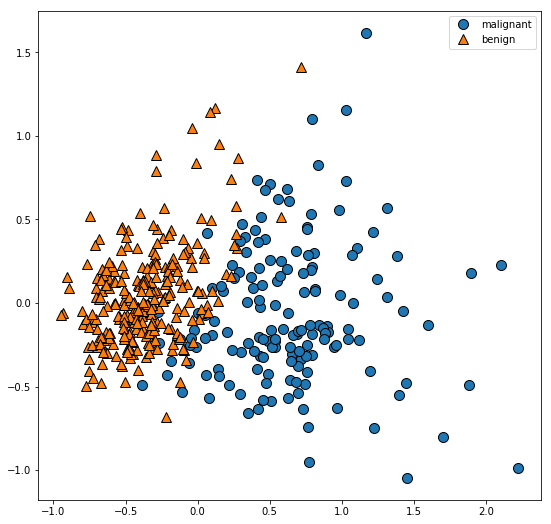

In [45]:
plt.figure(figsize=(9,9))
mglearn.discrete_scatter(X_pca[:, 0], X_pca[:, 1], y_train)
plt.legend(dataset.target_names, loc="best")


In [46]:
pca.components_

array([[ 0.236,  0.089,  0.245,  0.208,  0.113,  0.257,  0.291,  0.306,
         0.126,  0.046,  0.118,  0.008,  0.116,  0.101,  0.004,  0.128,
         0.066,  0.124,  0.027,  0.046,  0.249,  0.109,  0.249,  0.195,
         0.133,  0.217,  0.304,  0.355,  0.099,  0.116],
       [-0.277, -0.050, -0.255, -0.242,  0.168,  0.209,  0.085, -0.033,
         0.183,  0.387, -0.081,  0.057, -0.062, -0.093,  0.123,  0.210,
         0.093,  0.094,  0.141,  0.166, -0.254, -0.029, -0.219, -0.203,
         0.214,  0.204,  0.171,  0.029,  0.122,  0.317]])

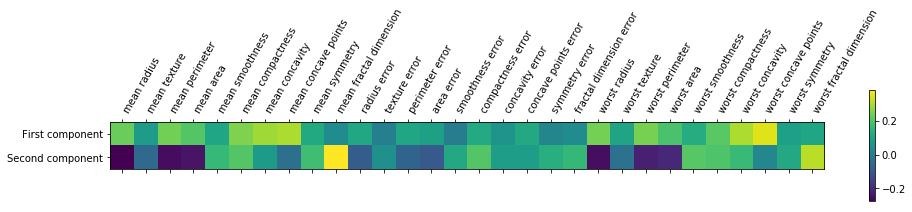

In [50]:
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0,1], ['First component', 'Second component'])
plt.xticks(range(len(dataset.feature_names)), dataset.feature_names, rotation=60, ha='left')
plt.colorbar()
plt.show()

In [2]:
from sklearn.datasets import fetch_lfw_people

In [3]:
people = fetch_lfw_people(min_faces_per_person=20, resize=0.7)

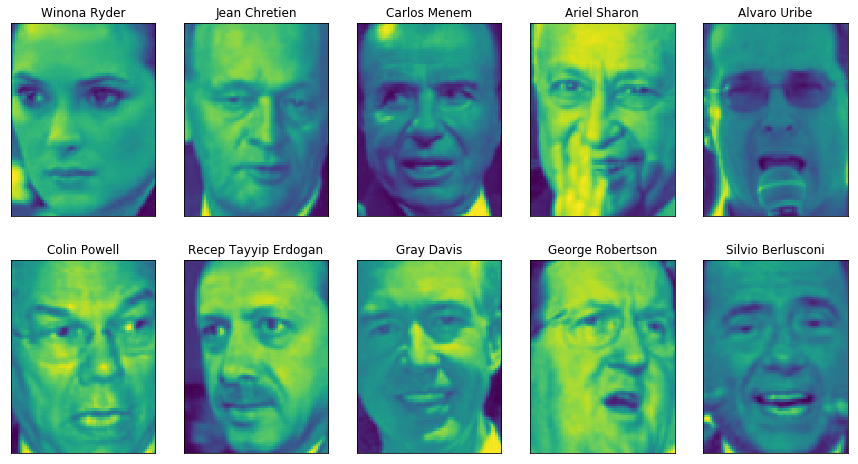

In [4]:
image_shape = people.images[0].shape
fix, axes = plt.subplots(2, 5, figsize=(15, 8), 
                         subplot_kw={'xticks': (), 'yticks':()})
for target, image, ax in zip(people.target, people.images, axes.ravel()):
    ax.imshow(image)
    ax.set_title(people.target_names[target])

In [5]:
counts = np.bincount(people.target)
for i, (count, name) in enumerate(zip(counts, people.target_names)):
    print("{0:25} {1:3}".format(name, count), end= '  ')
    if (i+1) %3 == 0:
        print()

Alejandro Toledo           39  Alvaro Uribe               35  Amelie Mauresmo            21  
Andre Agassi               36  Angelina Jolie             20  Ariel Sharon               77  
Arnold Schwarzenegger      42  Atal Bihari Vajpayee       24  Bill Clinton               29  
Carlos Menem               21  Colin Powell              236  David Beckham              31  
Donald Rumsfeld           121  George Robertson           22  George W Bush             530  
Gerhard Schroeder         109  Gloria Macapagal Arroyo    44  Gray Davis                 26  
Guillermo Coria            30  Hamid Karzai               22  Hans Blix                  39  
Hugo Chavez                71  Igor Ivanov                20  Jack Straw                 28  
Jacques Chirac             52  Jean Chretien              55  Jennifer Aniston           21  
Jennifer Capriati          42  Jennifer Lopez             21  Jeremy Greenstock          24  
Jiang Zemin                20  John Ashcroft              53

In [6]:
mask = np.zeros(people.target.shape, dtype=np.bool)
for target in np.unique(people.target):
    mask[np.where(people.target == target)[0][:50]] =1
    
X_people = people.data[mask]
y_people = people.target[mask]

In [7]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X_people, y_people, stratify=y_people, random_state=0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("Score: {:.2f}".format(knn.score(X_test, y_test)))

Score: 0.23


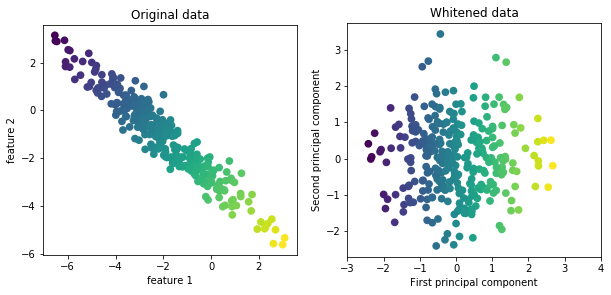

In [8]:
mglearn.plots.plot_pca_whitening()

In [13]:
pca = PCA(n_components=100, whiten=True, random_state=42).fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

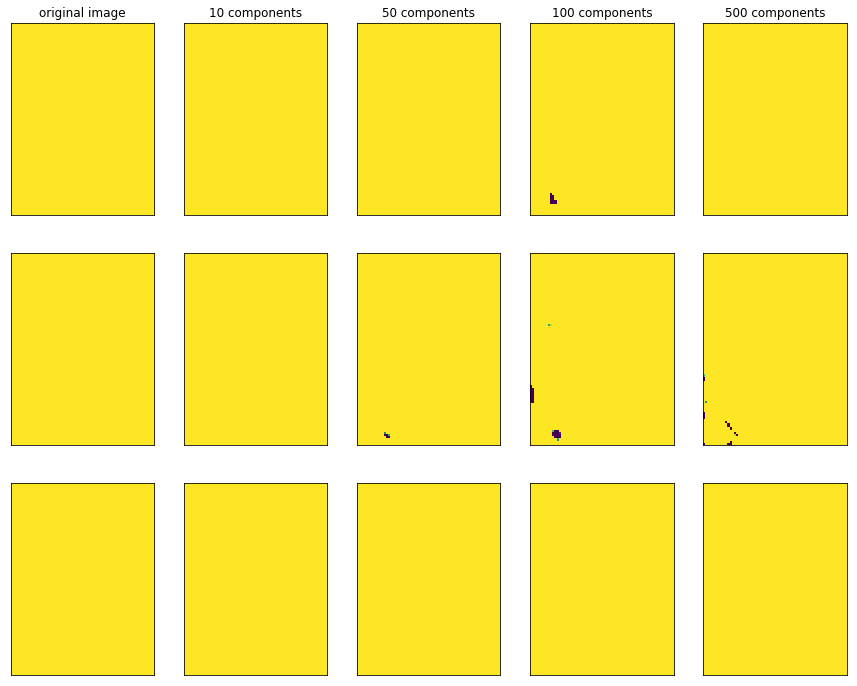

In [14]:
mglearn.plots.plot_pca_faces(X_train, X_test, image_shape)